In [1]:
# Diamonds Dataset (Seaborn)
# Описание: Характеристики бриллиантов.
# Задача: Предсказать цену.

In [2]:
import seaborn as sns
print(sns.__version__)  # Должна отобразиться версия

0.13.2


In [3]:
import pandas as pd
print(pd.__version__)

2.2.3


In [4]:
# Загрузка данных из CSV
df = sns.load_dataset('diamonds')

# Просмотр первых 5 строк
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [5]:
# общее количество строк в DataFrame
# через функцию len()
num_rows = len(df)
print(f"Всего строк: {num_rows}")

Всего строк: 53940


In [6]:
# Просмотр структуры данных
df.head()  # первые 5 строк
df.info()  # информация о типах данных и пропусках
df.describe()  # статистика числовых столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# Проверка на пропущенные значения
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
# Обработка категориальных признаков
# One-Hot Encoding 
df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'])
print(df.head())

   carat  depth  table  price     x     y     z  cut_Ideal  cut_Premium  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43       True        False   
1   0.21   59.8   61.0    326  3.89  3.84  2.31      False         True   
2   0.23   56.9   65.0    327  4.05  4.07  2.31      False        False   
3   0.29   62.4   58.0    334  4.20  4.23  2.63      False         True   
4   0.31   63.3   58.0    335  4.34  4.35  2.75      False        False   

   cut_Very Good  ...  color_I  color_J  clarity_IF  clarity_VVS1  \
0          False  ...    False    False       False         False   
1          False  ...    False    False       False         False   
2          False  ...    False    False       False         False   
3          False  ...     True    False       False         False   
4          False  ...    False     True       False         False   

   clarity_VVS2  clarity_VS1  clarity_VS2  clarity_SI1  clarity_SI2  \
0         False        False        False        False         

In [9]:
# Разделение на признаки и целевую переменную
X = df.drop('price', axis=1)  # 'price' — целевая переменная
y = df['price']

In [10]:
# Разделение на train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*****************
Метрики качества:
*****************
MAE: 398.0879
MSE: 517483.0543
RMSE: 719.3630
MAPE: 0.1285
R²: 0.9674


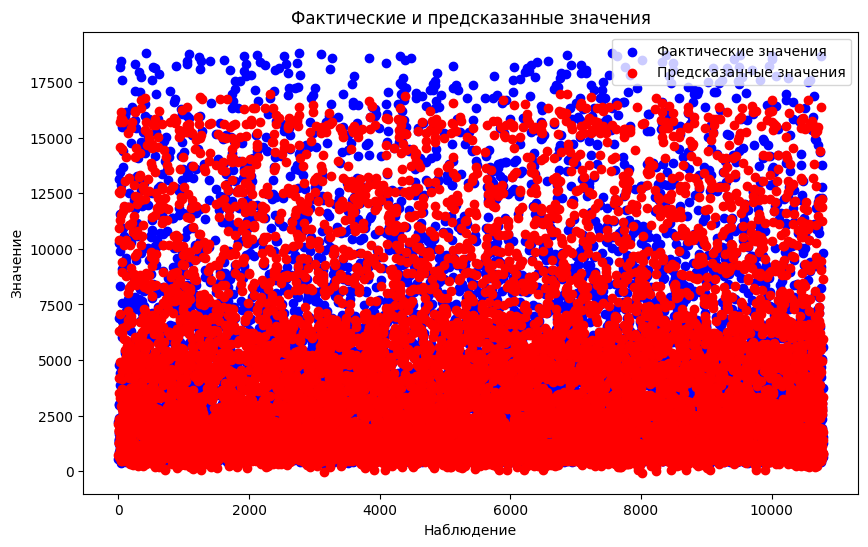

In [11]:
# Регрессор Gradient Boosting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Создание и обучение модели Gradient Boosting Regressor
model = GradientBoostingRegressor() # параметры
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()


Best parameters found: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500, 'subsample': 1.0}
*****************
Метрики качества:
*****************
MAE: 267.3842
MSE: 287249.5000
RMSE: 535.9566
MAPE: 0.0697
R²: 0.9819


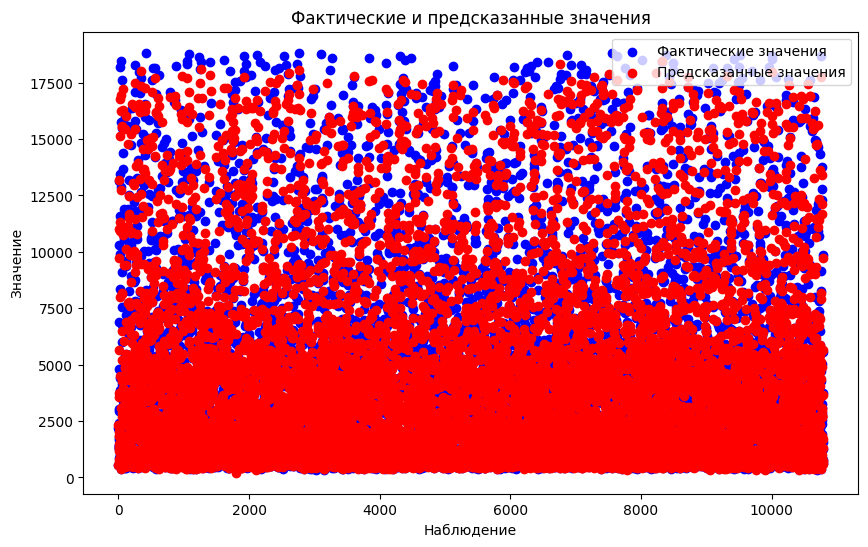

In [13]:
# XGBoost - Экстремальный градиентный бустинг.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Определение модели
model = XGBRegressor()

# Определение параметров для подбора
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Использование лучших параметров для обучения модели
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

*****************
Метрики качества:
*****************
MAE: 887.6822
MSE: 1902356.4049
RMSE: 1379.2594
MAPE: 0.2934
R²: 0.8803


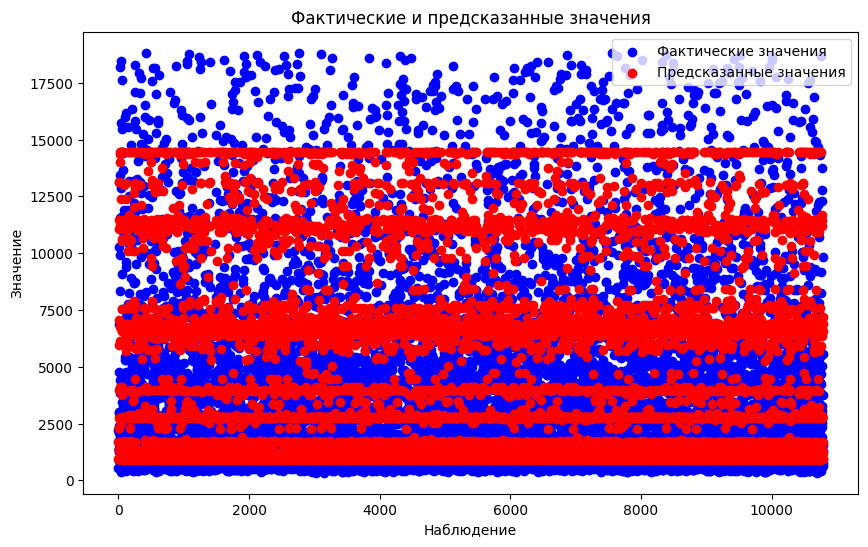

In [14]:
# Модель регрессии AdaBoost (Adaptive Boosting)
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Создание и обучение модели
base_model = DecisionTreeRegressor(max_depth=3)  # слабый learner
ada_model = AdaBoostRegressor(
    estimator=base_model,
    n_estimators=100,  # количество деревьев
    learning_rate=0.1,  # скорость обучения (меньше = более плавное обучение)
    random_state=42
)
ada_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = ada_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

*****************
Метрики качества:
*****************
MAE: 268.9042
MSE: 307062.0210
RMSE: 554.1318
MAPE: 0.0656
R²: 0.9807


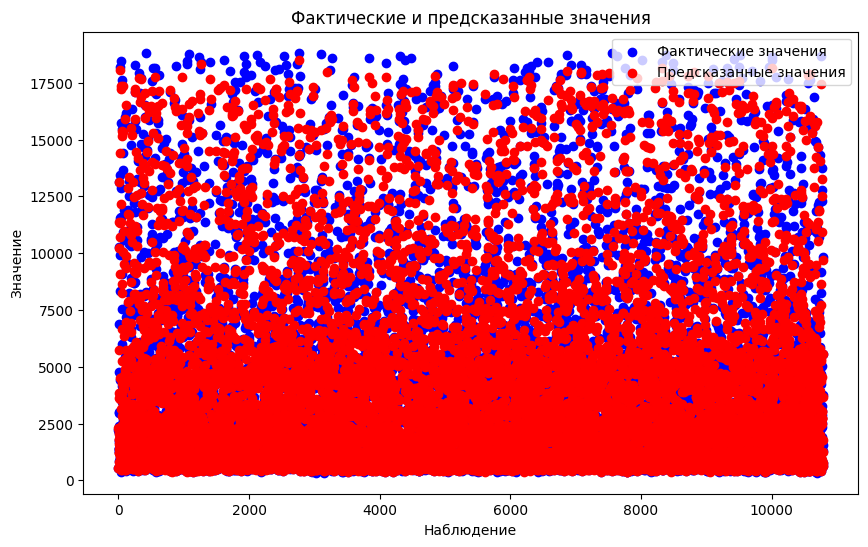

In [15]:
# Модель регрессии Extra Trees
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Создание и обучение модели
et_model = ExtraTreesRegressor(
    n_estimators=100,  # количество деревьев
    random_state=42,   # для воспроизводимости
    n_jobs=-1         # использование всех ядер CPU
)
et_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = et_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

*****************
Метрики качества:
*****************
MAE: 737.1514
MSE: 1288705.4779
RMSE: 1135.2116
MAPE: 0.3953
R²: 0.9189


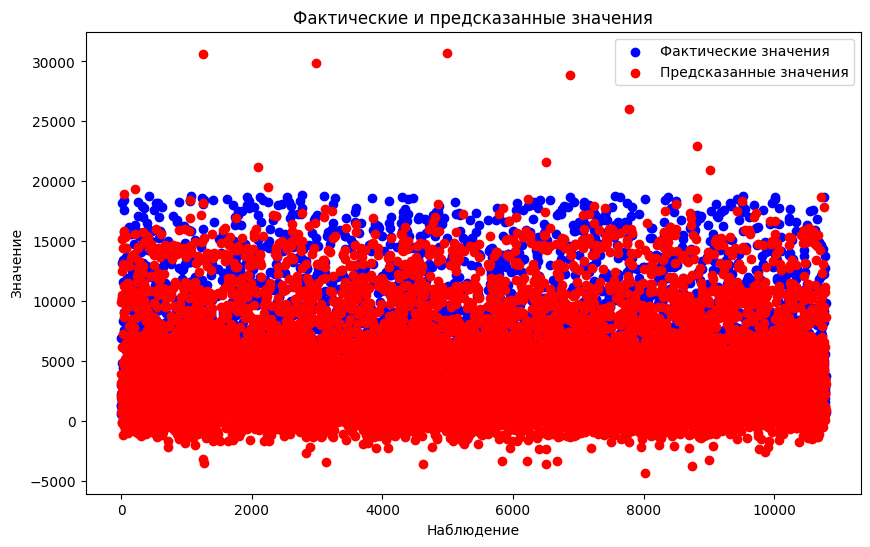

In [16]:
# Модель линейной регрессии
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()